In [1]:
import pandas as pd
import numpy as np

PT_data = pd.read_csv("data/PT_data.csv", index_col=0)
PT_data.head()

,273.15,298.15,323.15,348.15,373.15,423.15,473.15,523.15,573.15,623.15,673.15,723.15,773.15,873.15,973.15,1073.15,1173.15,1273.15
25,14.85,13.91,13.18,12.61,12.17,11.54,11.19,11.05,11.12,11.55,16.57,18.13,18.76,19.43,19.83,20.11,20.31,20.41
50,14.75,13.82,13.10,12.53,12.08,11.45,11.08,10.90,10.89,11.08,11.56,12.71,14.20,15.62,16.28,16.69,16.98,17.18
75,14.66,13.74,13.03,12.46,12.01,11.35,10.97,10.77,10.71,10.80,11.05,11.49,12.16,13.51,14.30,14.79,15.13,15.37
100,14.58,13.67,12.95,12.39,11.93,11.28,10.88,10.65,10.57,10.60,10.74,11.00,11.38,12.30,13.04,13.54,13.90,14.16
150,14.42,13.52,12.82,12.25,11.79,11.13,10.71,10.46,10.33,10.30,10.34,10.46,10.64,11.12,11.61,12.03,12.36,12.61


In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x_values = PT_data.columns.astype(float)
y_values = PT_data.index.astype(float)
X,Y = np.meshgrid(x_values, y_values)
Z = PT_data.values.astype(float)

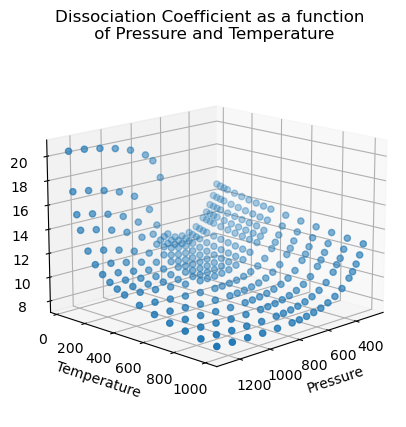

In [3]:
ax = plt.axes(projection='3d')
ax.scatter(X, Y, Z);

ax.set_xlabel('Pressure')
ax.set_ylabel('Temperature')
ax.set_title('Dissociation Coefficient as a function \n of Pressure and Temperature')

ax.view_init(15,45);

In [4]:
xy = np.column_stack((X.ravel(), Y.ravel()))
def func(xy, a, b, c, d, e, f): 
    X, Y = xy[:,0], xy[:,1]  # Separate xy into X and Y
    return a + b*X + c*Y + d*X**2 + e*Y**2 + f*X*Y

from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, xy, Z.ravel()) 
print(popt)

[ 1.70064437e+01 -1.31219513e-02 -6.49448246e-03  1.06179833e-05
  8.09373326e-06 -8.94980754e-06]


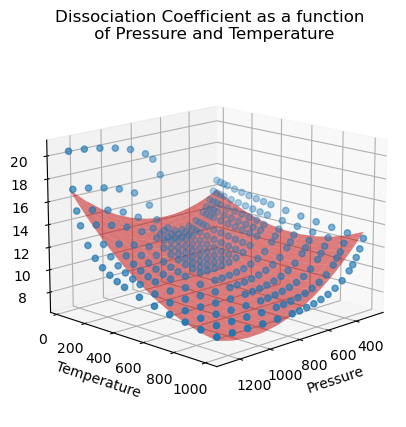

In [5]:
Z_fit = func(xy, *popt).reshape(X.shape)

ax2 = plt.axes(projection='3d')
ax2.scatter(X, Y, Z);
ax2.plot_surface(X, Y, Z_fit, color='r', alpha=0.5)

ax2.set_xlabel('Pressure')
ax2.set_ylabel('Temperature')
ax2.set_title('Dissociation Coefficient as a function \n of Pressure and Temperature')

ax2.view_init(15,45);